**Zadatak 3**

In [5]:
from sklearn.datasets import load_iris

In [6]:
# a)

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Nazivi znacajki:", feature_names)
print("Nazivi labela:", target_names)
print("\nPrvih 5 redova X:\n", X[:5])

Nazivi znacajki: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nazivi labela: ['setosa' 'versicolor' 'virginica']

Prvih 5 redova X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [7]:
# b)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_test.shape)
print(X_train.shape)

print(y_train.shape)
print(y_test.shape)

(45, 4)
(105, 4)
(105,)
(45,)


In [13]:
# c)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# d)

y_pred = classifier_knn.predict(X_test)

print("Tacnost:", metrics.accuracy_score(y_test, y_pred))

Tacnost: 0.9538461538461539


In [15]:
# e)

classifier_knn2 = KNeighborsClassifier(n_neighbors = 30)
classifier_knn2.fit(X_train, y_train)
y_pred = classifier_knn2.predict(X_test)

print("Tacnost:", metrics.accuracy_score(y_test, y_pred))


Tacnost: 0.9423076923076923


In [16]:
classifier_knn3 = KNeighborsClassifier(n_neighbors = 100)
classifier_knn3.fit(X_train, y_train)
y_pred = classifier_knn3.predict(X_test)

print("Tacnost:", metrics.accuracy_score(y_test, y_pred))

Tacnost: 0.9392307692307692


**Zadatak 4**

In [17]:
# a)

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)
print(x_test.nbytes)
print(x_train.nbytes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)
7840000
47040000


In [18]:
# b)

print(x_train.shape[0])

train_images = x_train.reshape((x_train.shape[0], 28 * 28))

train_images = train_images.astype("float32") / 255

test_images = x_test.reshape((x_test.shape[0], 28*28))

test_images = test_images.astype("float32") / 255

60000


In [19]:
# c)

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# d)

network.compile(optimizer="rmsprop", loss="categorical_crossentropy",
metrics=["accuracy"])

In [21]:
# e)

from keras.utils import to_categorical

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [22]:
# f)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8720 - loss: 0.4422
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9667 - loss: 0.1157
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9785 - loss: 0.0738
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9851 - loss: 0.0492
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9883 - loss: 0.0384


In [23]:
# g)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Tacnost za testni skup:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9786 - loss: 0.0717
Tacnost za testni skup: 0.9811000227928162


**LV3 Zadatak 1**

In [38]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# a)

red = pd.read_csv("/content/drive/MyDrive/VI-labovi/LV3 /winequality-red.csv", sep=";")
white = pd.read_csv("/content/drive/MyDrive/VI-labovi/LV3 /winequality-white.csv", sep=";")
white["label"] = 0
red["label"] = 1
wines = pd.concat([white, red], ignore_index=True)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [40]:
# b)

wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

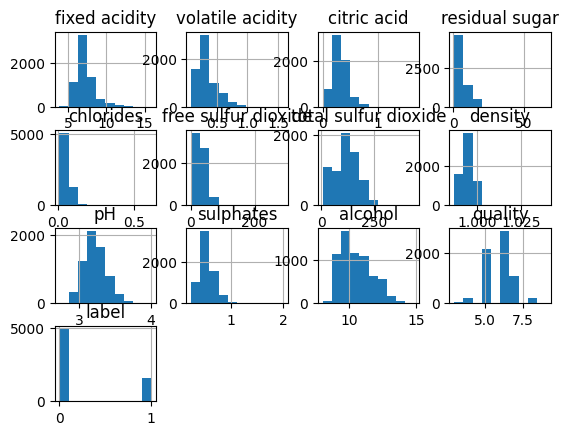

In [41]:
# b)

wines.hist()

In [37]:
# c)

X = wines.loc[:, wines.columns != "label"].to_numpy()
y = wines["label"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [31]:
# d)

model = models.Sequential()
model.add(layers.Dense(8, activation="relu", input_shape=(12,)))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [42]:
from keras import models
from keras import layers

In [43]:
# e)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [44]:
# f)

model.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7642 - loss: 0.8036
Epoch 2/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9378 - loss: 0.1885
Epoch 3/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9346 - loss: 0.1799
Epoch 4/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9418 - loss: 0.1623
Epoch 5/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9457 - loss: 0.1489
Epoch 6/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9468 - loss: 0.1437
Epoch 7/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9468 - loss: 0.1454
Epoch 8/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9556 - loss: 0.1251
Epoch 9/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9542 - loss: 0.1218
Epoch 10/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9591 - loss: 0.1179
Epoch 11/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9590 - loss: 0.1170
Epoch 12/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
# g)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = models.Sequential()
model.add(layers.Dense(8, activation="relu", input_shape=(12,)))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


325/325 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6607 - loss: 0.6202
Epoch 2/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9685 - loss: 0.1256
Epoch 3/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9824 - loss: 0.0643
Epoch 4/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0484
Epoch 5/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9888 - loss: 0.0369
Epoch 6/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9922 - loss: 0.0304
Epoch 7/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9913 - loss: 0.0289
Epoch 8/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9915 - loss: 0.0340
Epoch 9/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9911 - loss: 0.0373
Epoch 10/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9940 - loss: 0.0236
Epoch 11/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9967 - loss: 0.0184
Epoch 12/20
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

In [ ]:
# h)

results, test_acc = model.evaluate(X_test, y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9948 - loss: 0.0451
